# PAP DATASET

Import dependencies

In [1]:
import os, ast
from pathlib import Path

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
import spacy
# Load the spaCy English language model
!python -m spacy download en_core_web_sm --quiet
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Some constants: filepaths

In [3]:
# Change if necessary
DATASETS = "/mount/studenten/semantic-plausibility/datasets/pap"

In [4]:
notebook_dir = Path(os.getcwd())
dataset_dir = Path(DATASETS)

# Construct relative paths
raw_data_fp = dataset_dir / "raw-annotations" / "dataset.tsv"
binary_directory = dataset_dir / "train-dev-test-split" / "binary"
multi_directory = dataset_dir / "train-dev-test-split" / "multiclass"
aggregation = dataset_dir / "raw-annotations" / "mace_aggregations"/ "aggregated_predictions.tsv"
concrete_ratings = notebook_dir / "concrete_13428_2013_403_MOESM1_ESM.xlsx"

### Raw annotation

In [5]:
raw_df = pd.read_csv(raw_data_fp, sep='\t')
# convert the string representation to actual numerical representation
lists = ['rating', 'distribution_multiclass', 'distribution_binary']
raw_df[lists] = raw_df[lists].map(lambda x: ast.literal_eval(x.strip()))


In [6]:
raw_df.describe()

,event,original_label,abstractness_combination,rating,majority_multiclass,distribution_multiclass,majority_binary,distribution_binary
count,1733,1733,1733,1733,1733,1733,1733,1733
unique,1733,2,27,1708,2,409,3,33
top,ability means mobility,implausible,m-a-a,"[5, 5, 5, 4, 4, 5, 4, 5, 5]",unsure,"[0.0, 0.0, 50.0, 50.0]",1,"[100.0, 0.0]"
freq,1,871,72,3,1667,23,931,159


Some basic statistics of the dataset could be observed from above.
* Number of events: 1733 (no missing data)
* Number of original labels: 2 (almost perfectly balanced, with 871 implausible)
* Number of unique abstractness combination: 27
* For multiclass based on majority ratings, there are a significant amount of unsure class (1677/1733); this is expected due to the strict majority threshold (>70%)
* For binary class based on majority ratings, there are much more events rated as plausible (931/1733)
* Number of events where all annotators agree 100%: 159


In [7]:
# look at the first 10 rows
raw_df.head(10)

,event,original_label,abstractness_combination,rating,majority_multiclass,distribution_multiclass,majority_binary,distribution_binary
0,ability means mobility,plausible,a-m-a,"[2, 5, 4, 5, 5, 2, 5, 5, 5, 5]",5,"[0.0, 20.0, 10.0, 70.0]",1,"[80.0, 20.0]"
1,ability permits multiplication,plausible,a-c-m,"[5, 5, 5, 5, 4, 5, 5, 4]",5,"[0.0, 0.0, 25.0, 75.0]",1,"[100.0, 0.0]"
2,access diminishes power,plausible,a-m-a,"[4, 2, 5, 5, 5, 4, 4, 2, 4]",unsure,"[0.0, 22.22222222222222, 44.44444444444444, 33...",1,"[77.77777777777779, 22.22222222222222]"
3,achievement reaches community,plausible,a-c-m,"[1, 4, 1, 4, 5, 4, 5, 4, 5, 4]",unsure,"[20.0, 0.0, 50.0, 30.0]",1,"[80.0, 20.0]"
4,acquisition casts glance,plausible,a-c-m,"[4, 5, 4, 4, 4, 4, 1, 2]",unsure,"[12.5, 12.5, 62.5, 12.5]",1,"[75.0, 25.0]"
5,action catches interest,plausible,a-c-a,"[4, 4, 4, 4, 5, 5, 5, 4]",unsure,"[0.0, 0.0, 62.5, 37.5]",1,"[100.0, 0.0]"
6,advance decreases time,plausible,a-m-m,"[1, 5, 4, 5, 5, 2, 5, 4, 4]",unsure,"[11.11111111111111, 11.11111111111111, 33.3333...",1,"[77.77777777777779, 22.22222222222222]"
7,advance guarantees freedom,plausible,a-a-a,"[4, 4, 2, 4, 4, 2, 4, 2, 4]",unsure,"[0.0, 33.33333333333333, 66.66666666666666, 0.0]",unsure,"[66.66666666666666, 33.33333333333333]"
8,advantage leads state,plausible,a-c-m,"[5, 4, 4, 4, 4, 4, 4, 1]",unsure,"[12.5, 0.0, 75.0, 12.5]",1,"[87.5, 12.5]"
9,advantage outweighs risk,plausible,a-m-a,"[4, 4, 5, 5, 2, 4, 4, 4, 1]",unsure,"[11.11111111111111, 11.11111111111111, 55.5555...",1,"[77.77777777777779, 22.22222222222222]"


In average, there are 8.98 ratings for each event; all events have at least 8 ratings, there are some events with 12 ratings.

In [8]:
raw_df['number_ratings'] = raw_df['rating'].apply(len)
raw_df['number_ratings'].describe()

count    1733.000000
mean        8.984997
std         0.811867
min         8.000000
25%         8.000000
50%         9.000000
75%        10.000000
max        12.000000
Name: number_ratings, dtype: float64

In [9]:
raw_df["abstractness_combination"].describe()

count      1733
unique       27
top       m-a-a
freq         72
Name: abstractness_combination, dtype: object

Of the 27 abstractness combinations, the most common triple is of the type "m-a-a", with 72 triplets. As can be seen from the graph belows, the distribution of labels are almost balanced among abstractness combinations. The the least common triples are "a-m-a" and "m-m-a", with almost 60 triples for each type.

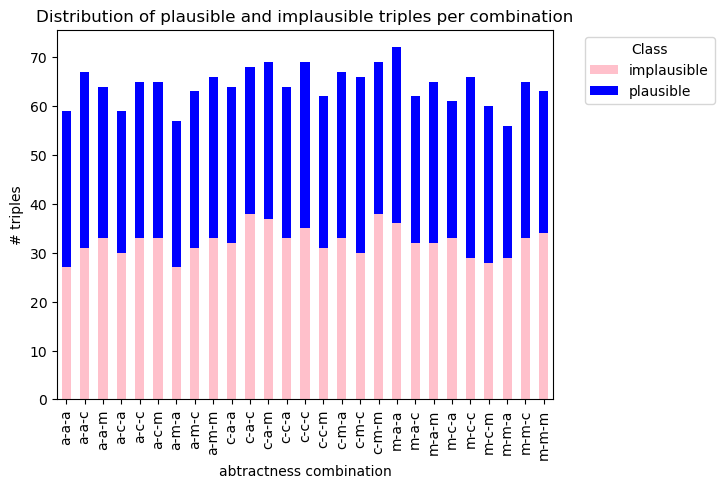

In [10]:
# count the number of each abstractness combination
combi_df = raw_df.groupby(["abstractness_combination","original_label"]).size().unstack()

# Plotting stacked bar chart
ax = combi_df.plot(kind='bar', stacked=True, color = ['pink', 'blue'])
plt.xlabel("abtractness combination")
plt.ylabel("# triples")
plt.title("Distribution of plausible and implausible triples per combination")

# moving the legen outside the plot area
ax.legend(title='Class', bbox_to_anchor=(1.05,1), loc='upper left')

For ease of visualization, we aggregate all individual ratings as average median rating per triples. The mean of median rating is 3.78, showing a tendency for average plausibility.

In [11]:
raw_df['average_ratings'] = raw_df['rating'].apply(pd.Series).median(axis=1)
raw_df['average_ratings'].describe()

count    1733.000000
mean        3.786786
std         0.957367
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: average_ratings, dtype: float64

In [12]:
# count the number of each rating 
rating_df = raw_df.groupby(["original_label","average_ratings"]).size().unstack().fillna(0)
rating_df

average_ratings,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
original_label,,,,,,,,,
implausible,27.0,20.0,157.0,9.0,82.0,0.0,508.0,37.0,31.0
plausible,6.0,5.0,38.0,4.0,36.0,1.0,451.0,101.0,220.0


As the belowed graph shows, there are a large amount of triples that have average ratings as {4, 4.5, 5}, showing that the ratings are skewed towards "plausible". 
Of the pseudo-implausible class, there are 157 triples rated as "weakly implausible"; while there are 451 triples that were attested in the corpus and also rated as "plausible". 
More notably, there are more than 500 pseudo-implausible triples rated as "plausible" or "highly plausible" (ratings in [4,5]).

<Axes: xlabel='average_ratings', ylabel='original_label'>

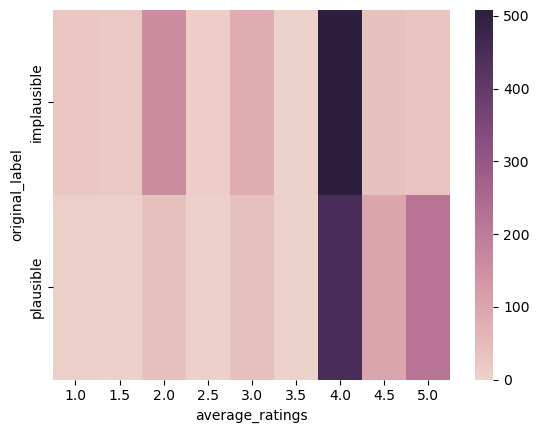

In [13]:
sns.heatmap(rating_df, cmap=sns.cubehelix_palette(as_cmap=True))

### Entropy in ratings

In this part, we try to see if there is any correlation between level of concreteness of each constituent and the disagreement (entropy) between annotators.

In [14]:
# read concreteness ratings
conc_df = pd.read_excel(concrete_ratings)

In [15]:
def calculate_abstractness_rating(svo, conc_df):
    """
    Take an event and assign their abstractness score based on ratings in an external source.
    """
    doc = nlp(svo)
    lemmas = [token.lemma_ for token in doc]
    abstract_score = []

    for l in lemmas:
        conc_value = conc_df.loc[conc_df['Word'] == l, "Conc.M"].values
        if len(conc_value) > 0:
            abstract_score.extend(conc_value)
    
    return abstract_score


In [16]:
# Apply the function to calculate abstract scores for each row in "event" column
# This might take a while
raw_df['abstract_score'] = raw_df['event'].apply(lambda x: calculate_abstractness_rating(x, conc_df))
raw_df['abstract_ratings'] = raw_df['abstract_score'].apply(sum)

In [17]:
def calculate_entropy(prob_distribution):
    "take a prob distribution and calculate entropy of distribution"
    prob_arr = np.array(prob_distribution)/100
    # Check if one probability is 1 and the other is 0
    if (prob_arr[0] == 1 and prob_arr[1] == 0) or (prob_arr[0] == 0 and prob_arr[1] == 1):
        return 0

    ent = -np.sum(prob_arr * np.log2(prob_arr))
    
    return ent


In [18]:
# Apply the entropy calculation function to each cell in the DataFrame
raw_df['entropy'] = raw_df['distribution_binary'].map(calculate_entropy)

# Split the list column into three columns
raw_df[['subject_concreteness', 'verb_concreteness', 'object_concreteness']] = raw_df['abstract_score'].apply(pd.Series)

all_conc = ['subject_concreteness', 'verb_concreteness', 'object_concreteness']
for col in all_conc:
    cor = raw_df[col].corr(raw_df['entropy'])
    print(f"Correlation between {col.upper()} and class entropy: {cor}")

Correlation between SUBJECT_CONCRETENESS and class entropy: 0.017812649184010203
Correlation between VERB_CONCRETENESS and class entropy: 0.02657777615137733
Correlation between OBJECT_CONCRETENESS and class entropy: 0.15362259584526505


Level of concreteness of each constituent in s-v-o triples show weak correlation to the disagreement of annotators. Importantly, level of concreteness of objects has positive correlation with annotation entropy, suggesting that the more concrete the objects are, the more annotators disagree about the triples' plausibility.

### Aggregation labels

In [19]:
aggre_df = pd.read_csv(aggregation, sep='\t')
aggre_df.describe()

,multi-class_prediction,binary_prediction
count,2160.000000,2160.000000
mean,3.412037,0.712500
std,1.553029,0.452701
min,1.000000,0.000000
25%,2.000000,0.000000
50%,4.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [20]:
aggre_df.head()

,event,original_label,multi-class_prediction,binary_prediction
0,ability means mobility,plausible,5,1
1,ability permits multiplication,plausible,5,1
2,abnormality irrigates year,implausible,2,1
3,abstraction kicks peanut,implausible,1,0
4,abuser encourages broadcasting,implausible,5,1


Overall, the mean of ratings is 3.4 for multi-class prediction and 0.7 for binary prediction, showing that the dataset is skewed towards Positive class.

In [21]:
def plot_bar_chart(df, col1, col2, title):
    df_dist = df.groupby([col1, col2]).size().unstack()
    df_dist.plot(kind='bar', color = ['pink','blue'])
    plt.ylabel("# triples")
    plt.title(title)

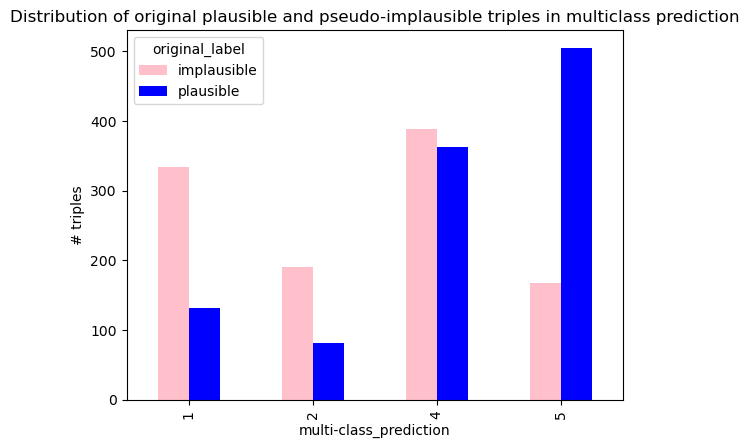

In [22]:
plot_bar_chart(aggre_df,"multi-class_prediction",  "original_label", "Distribution of original plausible and pseudo-implausible triples in multiclass prediction")

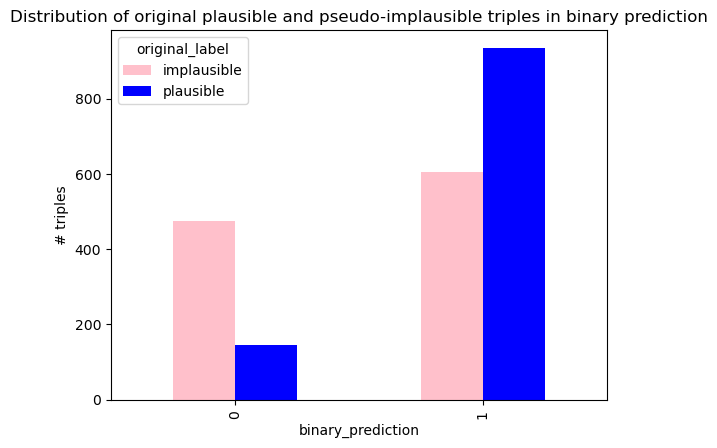

In [23]:
plot_bar_chart(aggre_df,"binary_prediction",  "original_label", "Distribution of original plausible and pseudo-implausible triples in binary prediction")

It could be seen that the majority triples of Negative class are original implausible triples. Interestingly, original implausible triples make up a large part of aggregated Positive class, with more than 600 triples that have different labels as the original one. 

### Train - Dev - Test

In [24]:
csv_files = ['train.csv', 'dev.csv', 'test.csv']
def read_csv_data(directory_path):
    "read all three csv files and combine as a dataframe"
    dfs = {} # dict to store all dataframes
    # read each csv file into a dataframe and store it in the dictionary
    for f in csv_files:
        file_path = os.path.join(directory_path, f)
        df_name = os.path.splitext(f)[0] # extracting dataframe name from the file
        dfs[df_name] = pd.read_csv(file_path)
    train_df = dfs['train']
    dev_df = dfs['dev']
    test_df = dfs['test']
    train_df['split'] = 'train'
    dev_df['split'] = 'dev'
    test_df['split'] = 'test'

    # combine all splits into a single DataFrame
    combined_df = pd.concat([train_df, dev_df, test_df], ignore_index=True)

    return combined_df


In [25]:
def plot_grouped_subplot_barchart(df):
    "Plot a grouped bar chart with subplots"
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

    # plot each split seperately 
    for idx, ax in enumerate(axes):
        split_df = df[df['split'] == df['split'].unique()[idx]]
        split_dist = split_df.groupby(['label','original_label']).size().unstack()
        split_dist.plot(kind='bar', ax=ax, rot=0, color=['pink','blue'])
        ax.set_title(f'{df["split"].unique()[idx]} split')

    #adding labels and title for the figure
    fig.suptitle('Label Distribution of Dataset Splits')

#### Binary labels

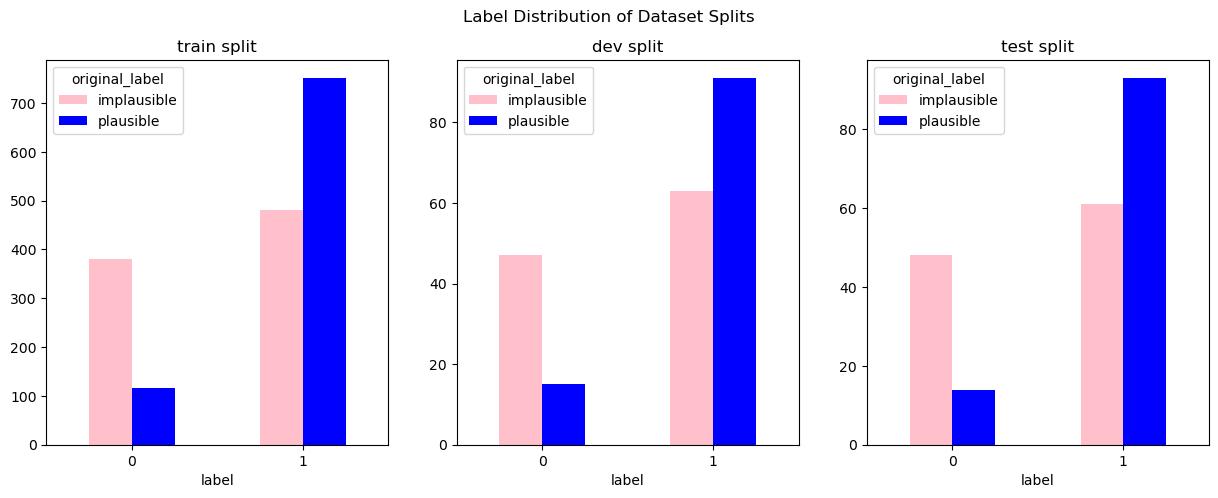

In [26]:
combined_bindf = read_csv_data(binary_directory)
plot_grouped_subplot_barchart(combined_bindf)

As can be seen from the graph, the label distributions are quite similar in the three splits. There are more instances with "plausible" label, and there are large amount of them were pertubated triples which have not been attested in Wikipedia corpus.

#### Multiclass setup

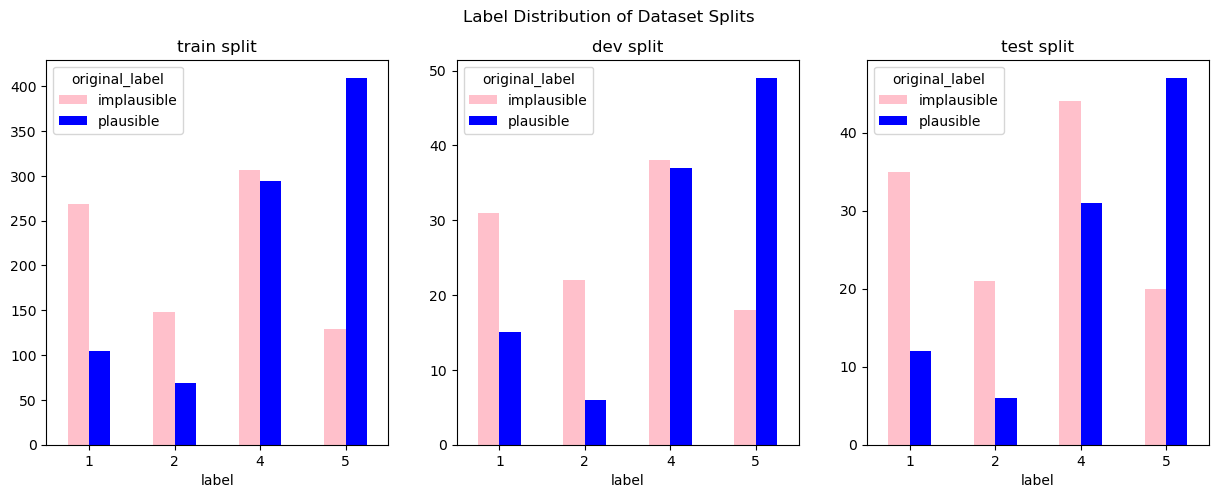

In [27]:
combined_multidf = read_csv_data(multi_directory)
plot_grouped_subplot_barchart(combined_multidf)

In multiclass setting, four classes are distributed similarly in the three splits. There are significant amount of "highly plausible" triples. Put it more specifically, most of the triples in the test split are in {4, 5}, with large shares of orignally implausible triples. 